In [7]:
import scipy.sparse

# 创建一个3x3的CSC稀疏矩阵
data = [1, 0, 3, 0, 5, 0, 7, 0, 9]
row_indices = [0, 1, 2, 0, 1, 2, 0, 1, 2]
col_pointers = [0, 3, 6, 9]

csc_matrix = scipy.sparse.csc_matrix((data, row_indices, col_pointers))
print(csc_matrix)
display(type(csc_matrix))
print('----------')

  (0, 0)	1
  (1, 0)	0
  (2, 0)	3
  (0, 1)	0
  (1, 1)	5
  (2, 1)	0
  (0, 2)	7
  (1, 2)	0
  (2, 2)	9


scipy.sparse._csc.csc_matrix

----------


In [8]:
dense_matrix = csc_matrix.toarray()
print(dense_matrix)

[[1 0 7]
 [0 5 0]
 [3 0 9]]


In [9]:
# 获取稀疏矩阵的行指针和列索引信息
indptr = csc_matrix.indptr
display(indptr)
display(type(indptr))
indices = csc_matrix.indices
display(indices)
display(type(indices))
for col in range(csc_matrix.shape[1]):
    start = indptr[col]
    end = indptr[col + 1]
    for row_index in indices[start:end]:
        value = csc_matrix[row_index, col]
        print(f"Row: {row_index}, Column: {col}, Value: {value}")

array([0, 3, 6, 9])

numpy.ndarray

array([0, 1, 2, 0, 1, 2, 0, 1, 2])

numpy.ndarray

Row: 0, Column: 0, Value: 1
Row: 1, Column: 0, Value: 0
Row: 2, Column: 0, Value: 3
Row: 0, Column: 1, Value: 0
Row: 1, Column: 1, Value: 5
Row: 2, Column: 1, Value: 0
Row: 0, Column: 2, Value: 7
Row: 1, Column: 2, Value: 0
Row: 2, Column: 2, Value: 9


D:\JIBI\pycharm笔记相关\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


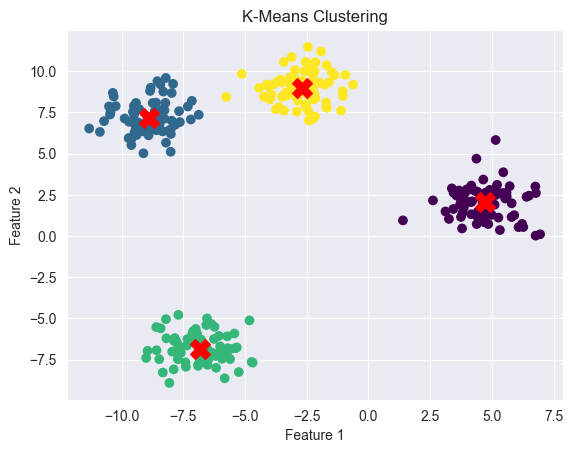

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 生成随机数据
np.random.seed(0)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 使用 K-Means 进行聚类
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [11]:
import pandas as pd
import numpy as np

# 生成一个随机的数据框，3行4列
np.random.seed(0)  # 设置随机种子以保证结果可重现
data = np.random.randint(0, 10, size=(3, 4))  # 生成0到9的随机整数
columns = ['Column1', 'Column2', 'Column3', 'Column4']
index = ['Row1', 'Row2', 'Row3']

df = pd.DataFrame(data, columns=columns, index=index)

# 打印随机生成的数据框
print(df)
display(df.columns.tolist())

      Column1  Column2  Column3  Column4
Row1        5        0        3        3
Row2        7        9        3        5
Row3        2        4        7        6


['Column1', 'Column2', 'Column3', 'Column4']

In [19]:
import pandas as pd
data = df.copy()
# 假设你的数据框是 data，包含 UMIs 行和基因列
display(data)
# 对每个细胞的UMIs进行缩放，使得总UMIs数等于固定值（例如1百万）
total_counts_per_cell = data.sum(axis=1)  # 计算每个细胞的总UMIs数
print(total_counts_per_cell)
scaling_factor = 1000000 / total_counts_per_cell  # 计算每个细胞的缩放因子
normalized_data = data.multiply(scaling_factor, axis=0)  # 对每个细胞的UMIs进行缩放
display(normalized_data)
# 将缩放后的数据存储在 normalized_data 中


,Column1,Column2,Column3,Column4
Row1,5,0,3,3
Row2,7,9,3,5
Row3,2,4,7,6


Row1    11
Row2    24
Row3    19
dtype: int64


,Column1,Column2,Column3,Column4
Row1,454545.454545,0.000000,272727.272727,272727.272727
Row2,291666.666667,375000.000000,125000.000000,208333.333333
Row3,105263.157895,210526.315789,368421.052632,315789.473684


In [26]:
normalized_data.columns[1]

'Column2'

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef

# 设置随机种子以保证结果可重现
np.random.seed(0)

# 生成示例数据
num_samples = 1000
num_features = 10
X = np.random.rand(num_samples, num_features)
y = np.random.randint(2, size=num_samples)  # 生成0或1的随机标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 初始化逻辑回归模型
model = LogisticRegression()

# 在训练集上训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 使用MCC评估模型性能
mcc = matthews_corrcoef(y_test, y_pred)

print("Matthews correlation coefficient:", mcc)

Matthews correlation coefficient: -0.05334258635360832


In [13]:
print('finish0')

finish0


In [23]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# 生成可重现的随机数据
np.random.seed(42)
data = np.random.rand(5, 100)

# 将数据转换为数据框，行是UMIs，列是基因
gene_names = [f'Gene{i}' for i in range(1, 101)]
data_df = pd.DataFrame(data, columns=gene_names)
display(data_df)
# 使用PCA进行特征筛选
n_components = 2  # 设置降维后的维度
pca = PCA(n_components= n_components)
pca_result = pca.fit_transform(data_df.T)  # 对数据的转置进行PCA

# 输出PCA结果
print("PCA结果:")
print(pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(n_components)]))

# 输出主成分的贡献率
print("主成分的贡献率:")
print(pca.explained_variance_ratio_)

# 输出特征筛选后的基因
selected_genes = [gene_names[i] for i in np.argsort(pca.components_[0])[::-1][:n_components]]
print("筛选后的特征基因:")
print(selected_genes)

,Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,...,Gene91,Gene92,Gene93,Gene94,Gene95,Gene96,Gene97,Gene98,Gene99,Gene100
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.119594,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891
1,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.093103,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876
2,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.030500,0.037348,0.822601,0.360191,0.127061,0.522243,0.769994,0.215821,0.622890,0.085347
3,0.051682,0.531355,0.540635,0.637430,0.726091,0.975852,0.516300,0.322956,0.795186,0.270832,...,0.990505,0.412618,0.372018,0.776413,0.340804,0.930757,0.858413,0.428994,0.750871,0.754543
4,0.103124,0.902553,0.505252,0.826457,0.320050,0.895523,0.389202,0.010838,0.905382,0.091287,...,0.455657,0.620133,0.277381,0.188121,0.463698,0.353352,0.583656,0.077735,0.974395,0.986211


PCA结果:
         PC1       PC2
0  -0.585185  0.076580
1   0.407338  0.292742
2   0.145770  0.101999
3   0.127105  0.316258
4   0.011463 -0.504780
..       ...       ...
95  0.168661 -0.137770
96  0.166553 -0.055927
97 -0.200797 -0.508441
98  0.459662 -0.214892
99  0.681847 -0.280205

[100 rows x 2 columns]
主成分的贡献率:
[0.2654305  0.24233576]
筛选后的特征基因:
['Gene5', 'Gene4']


In [25]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# 生成可重现的随机数据
np.random.seed(42)
data = np.random.rand(5, 100)

# 将数据转换为数据框，行是UMIs，列是基因
gene_names = [f'Gene{i}' for i in range(1, 101)]
data_df = pd.DataFrame(data, columns=gene_names)

# 获取数据维度的最小值
min_dimension = min(data_df.shape)

# 使用交叉验证选择最佳维度
best_n_components = None
best_score = -float('inf')  # 初始化最佳得分为负无穷
for n_components in range(1, min_dimension + 1):
    pca = PCA(n_components=n_components)
    scores = cross_val_score(pca, data_df.T, cv=5)  # 交叉验证计算得分
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score = avg_score
        best_n_components = n_components

print("最佳维度:", best_n_components)

# 使用最佳维度进行PCA
pca = PCA(n_components=best_n_components)
pca_result = pca.fit_transform(data_df.T)

# 输出PCA结果
print("PCA结果:")
print(pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(best_n_components)]))

# 输出主成分的贡献率
print("主成分的贡献率:")
print(pca.explained_variance_ratio_)

# 输出特征筛选后的基因
selected_genes = [gene_names[i] for i in np.argsort(pca.components_[0])[::-1][:best_n_components]]
print("筛选后的特征基因:")
print(selected_genes)


最佳维度: 3
PCA结果:
         PC1       PC2       PC3
0  -0.585185  0.076580 -0.279295
1   0.407338  0.292742  0.574440
2   0.145770  0.101999  0.227924
3   0.127105  0.316258 -0.158893
4   0.011463 -0.504780 -0.049021
..       ...       ...       ...
95  0.168661 -0.137770 -0.168294
96  0.166553 -0.055927 -0.057249
97 -0.200797 -0.508441  0.383645
98  0.459662 -0.214892 -0.165260
99  0.681847 -0.280205  0.105989

[100 rows x 3 columns]
主成分的贡献率:
[0.2654305  0.24233576 0.21256322]
筛选后的特征基因:
['Gene5', 'Gene4', 'Gene2']


In [1]:
import numpy as np
from scipy.sparse import csc_matrix

# 假设 your_array 是一个二维数组
your_array = np.array([[1, 0, 2],
                       [0, 3, 0],
                       [4, 0, 5]])

# 使用 csc_matrix 函数将二维数组转换为稀疏矩阵
sparse_matrix = csc_matrix(your_array)

print(type(sparse_matrix))  # <class 'scipy.sparse.csc.csc_matrix'>

<class 'scipy.sparse._csc.csc_matrix'>


In [3]:
print(sparse_matrix)

  (0, 0)	1
  (2, 0)	4
  (1, 1)	3
  (0, 2)	2
  (2, 2)	5


In [8]:
import pandas as pd
import numpy as np

# 假设 df_train 是训练数据框，df_test 是测试数据框
data_train = {'UMIs': ['UMI1', 'UMI2', 'cell5']}
data_test = {'UMIs': ['UMI3', 'UMI1']}

df_train = pd.DataFrame(data_train, index=['cell1', 'cell2', 'cell4'])
df_test = pd.DataFrame(data_test, index=['cell4', 'cell5'])
print(df_train)
print(df_test)
# 找到 df_train['UMIs'] 列的值在 df_test 行索引名中出现的位置
matching_indices = np.where(df_test.index.isin(df_train['UMIs']))

print(matching_indices)  # 输出匹配的行索引名的索引号

        UMIs
cell1   UMI1
cell2   UMI2
cell4  cell5
       UMIs
cell4  UMI3
cell5  UMI1
(array([1], dtype=int64),)


In [10]:
print(type(matching_indices[0]))

<class 'numpy.ndarray'>
